
# Aula 6



## uteis

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
def printImg(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap="gray")

mat = np.array([
    [4, 5, 7, 7, 7, 8, 6],
    [7, 6, 7, 5, 7, 7, 7],
    [6, 5, 4, 10, 12, 12, 11],
    [10, 9, 8, 7, 5, 5, 6],
    [11, 8, 8, 8, 7, 6, 6],
    [5, 6, 7, 6, 6, 6, 6],
    [4, 5, 10, 9, 9, 8, 8]])

## Exer 1

### A) Existem pixels adjacentes? No sentido 4-P, 8P ou diagonal?

In [29]:


# Encontrando elementos adjacentes no sentido 4-P
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]-1):
        if mat[i,j] == mat[i,j+1]:
            print(f'Adjacentes no sentido 4-P: ({i},{j}) e ({i},{j+1})')

# Encontrando elementos adjacentes no sentido 8-P
for i in range(mat.shape[0]-1):
    for j in range(mat.shape[1]-1):
        if mat[i,j] == mat[i+1,j] or mat[i,j] == mat[i,j+1] or mat[i,j] == mat[i+1,j+1]:
            print(f'Adjacentes no sentido 8-P: ({i},{j}) e ({i+1},{j+1})')

# Encontrando elementos adjacentes na diagonal
for i in range(mat.shape[0]-1):
    for j in range(mat.shape[1]-1):
        if mat[i,j] == mat[i+1,j+1]:
            print(f'Adjacentes na diagonal principal: ({i},{j}) e ({i+1},{j+1})')
        if mat[i+1,j] == mat[i,j+1]:
            print(f'Adjacentes na diagonal secundária: ({i+1},{j}) e ({i},{j+1})')

Adjacentes no sentido 4-P: (0,2) e (0,3)
Adjacentes no sentido 4-P: (0,3) e (0,4)
Adjacentes no sentido 4-P: (1,4) e (1,5)
Adjacentes no sentido 4-P: (1,5) e (1,6)
Adjacentes no sentido 4-P: (2,4) e (2,5)
Adjacentes no sentido 4-P: (3,4) e (3,5)
Adjacentes no sentido 4-P: (4,1) e (4,2)
Adjacentes no sentido 4-P: (4,2) e (4,3)
Adjacentes no sentido 4-P: (4,5) e (4,6)
Adjacentes no sentido 4-P: (5,3) e (5,4)
Adjacentes no sentido 4-P: (5,4) e (5,5)
Adjacentes no sentido 4-P: (5,5) e (5,6)
Adjacentes no sentido 4-P: (6,3) e (6,4)
Adjacentes no sentido 4-P: (6,5) e (6,6)
Adjacentes no sentido 8-P: (0,2) e (1,3)
Adjacentes no sentido 8-P: (0,3) e (1,4)
Adjacentes no sentido 8-P: (0,4) e (1,5)
Adjacentes no sentido 8-P: (1,4) e (2,5)
Adjacentes no sentido 8-P: (1,5) e (2,6)
Adjacentes no sentido 8-P: (2,4) e (3,5)
Adjacentes no sentido 8-P: (3,2) e (4,3)
Adjacentes no sentido 8-P: (3,3) e (4,4)
Adjacentes no sentido 8-P: (3,4) e (4,5)
Adjacentes no sentido 8-P: (4,1) e (5,2)
Adjacentes no se

### B) Calcule o Histograma de intensidades de níveis de cinza desta imagem

[ 0  0  0  0  3  7 11 11  7  3  3  4]


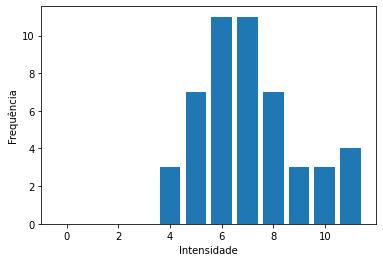

In [11]:
hist, bins = np.histogram(mat, bins=np.arange(0,13))
print(hist)
plt.bar(bins[:-1], hist, align='center')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')
plt.show()

### C) Qual o histograma acumulado?

[ 0  0  0  0  3 10 21 32 39 42 45 49]


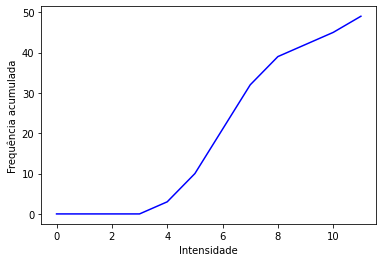

In [12]:
hist, bins = np.histogram(mat, bins=np.arange(0,13))
hist_cum = np.cumsum(hist)
print(hist_cum)
plt.plot(bins[:-1], hist_cum, color='blue')
plt.xlabel('Intensidade')
plt.ylabel('Frequência acumulada')
plt.show()

### D) Qual o histograma normalizado?

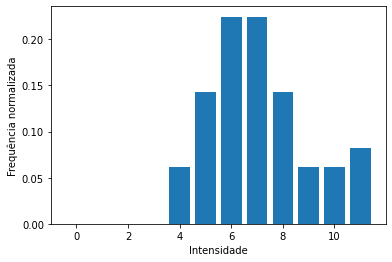

In [13]:

hist_norm = hist / hist_cum[-1]

plt.bar(bins[:-1], hist_norm, align='center', width=0.8)
plt.xlabel('Intensidade')
plt.ylabel('Frequência normalizada')
plt.show()

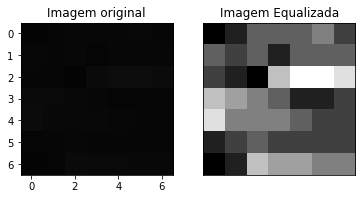

In [33]:
a = 255/(mat.max() - mat.min())
b = -a*mat.min()

mat_equalizada = a*mat + b



plt.subplot(1, 2, 1)
plt.imshow(mat, cmap='gray',  vmin=0, vmax=255)
plt.title('Imagem original')

plt.subplot(1, 2, 2)
plt.imshow(mat_equalizada, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Equalizada')
plt.xticks([])
plt.yticks([], vmin=0, vmax=255)
plt.show()

### F) Como fica a representação da imagem comprimida utilizando a seguinte transformação:

“intensidades <= 8” → 8

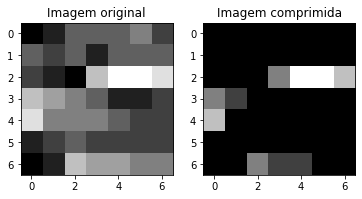

In [34]:
mat_compressed = np.where(mat <= 8, 8, mat)
plt.subplot(1, 2, 1)
plt.imshow(mat, cmap='gray')
plt.title('Imagem original')

plt.subplot(1, 2, 2)
plt.imshow(mat_compressed, cmap='gray')
plt.title('Imagem comprimida')

plt.show()

## Exer 2

Implemente um programa que deverá solicitar ao usuário as coordenadas de dois 
pontos P1 e P2 (inicio e fim da região) localizados dentro dos limites do tamanho 
da imagem e exibir que lhe for fornecida. Entretanto, a região definida pelo 
retângulo definidos pelos pontos P1 e P2 será exibida com o negativo da imagem 
na região correspondente.
Veja o exemplo abaixo;

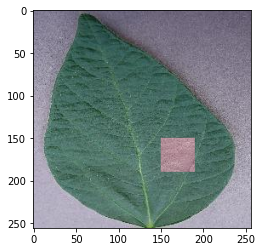

In [35]:


imagem = cv2.imread("imagemFolha.jpg")

x1 = int(input("Digite a coordenada x do ponto P1: "))
y1 = int(input("Digite a coordenada y do ponto P1: "))
x2 = int(input("Digite a coordenada x do ponto P2: "))
y2 = int(input("Digite a coordenada y do ponto P2: "))
if x1 > x2:
    x1, x2 = x2, x1
if y1 > y2:
    y1, y2 = y2, y1

imagem[x1:x2, y1:y2] = (255 - imagem[x1:x2, y1:y2])


printImg(imagem)